In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import argparse
from glob import glob
# rdir = 'results/regression/'
rdir = 'old_results/results_*/regression/'
frames = []
# load regression results
for f in glob(rdir + '*/*R.csv'):
        
    df = pd.read_csv(f,sep='\t',index_col=None)

#     print(f)
    if 'Feat' not in f:
        continue
    alg = df.algorithm.unique()
    if len(alg)>0:
        if 'Feat' in alg[0]:
#               df['method'] = alg[0]
            df['method'] = [d[4:] for d in df['algorithm']]
#             df['method'] = df['method'].apply(lambda x: 'Feat' if x == '' else x)
        elif 'MLP' in alg[0]:
            df['method'] = 'MLP'
        else:
            df['method'] = df['algorithm']
    else:
        df['method'] = df['algorithm']
    df['median_score'] = df['score'].median()
#     df['method'] = f.split('Feat')[1].split('R.csv')[0]
    df['dataset'] = f.split('/')[-2]
    
    frames.append(df)
df_reg = pd.concat(frames)

print(len(df_reg), 'results')

print(df_reg.columns)
print(len(df_reg['dataset'].unique()),'datasets')
print('methods:',df_reg.method.unique())
print('unique seeds:',len(df_reg.seed.unique()))
print('dataset results',df_reg.groupby(['method']).count().reset_index())
# look at summaries
counts={}
methods = df_reg.method.unique()
for d,df_d in df_reg.groupby('dataset'):
    counts[d] = len(df_d['algorithm'].unique())
cool_ds = [d for d in counts.keys() if counts[d]>=len(methods)]
notcool_ds = [d for d in counts.keys() if counts[d]<len(methods)]
print(len(cool_ds),'cool ds')
# filter datasets without results
df_reg = df_reg.loc[df_reg['dataset'].isin(cool_ds)]
print('not cool ds:',notcool_ds)

print('methods:',df_reg.method.unique())
print('methods:',df_reg.algorithm.unique())
df_reg['score'] = df_reg['score'].astype(float)
df_reg['size'] = df_reg['size'].astype(float)

2721 results
Index(['dataset', 'algorithm', 'parameters', 'seed', 'score', 'corr', 'time',
       'size', 'method', 'median_score'],
      dtype='object')
91 datasets
methods: ['LexNSGA2' 'Lex' 'Random' 'SimAnneal' 'NSGA2']
unique seeds: 660
dataset results       method  dataset  algorithm  parameters  seed  score  corr  time  size  \
0        Lex      536        536         536   536    536   468   536   536   
1   LexNSGA2      614        614         614   614    614   565   614   614   
2      NSGA2      559        559         559   559    559   508   559   559   
3     Random      452        452         452   452    452   452   452   452   
4  SimAnneal      560        560         560   560    560   511   560   560   

   median_score  
0           536  
1           614  
2           559  
3           452  
4           560  
90 cool ds
not cool ds: ['201_pol']
methods: ['LexNSGA2' 'Lex' 'Random' 'SimAnneal' 'NSGA2']
methods: ['FeatLexNSGA2' 'FeatLex' 'FeatRandom' 'FeatSimAnneal' 'F

In [5]:
Order = ['LexNSGA2', 'Lex', 'NSGA2','SimAnneal','Random' ]

Index(['did', 'MajorityClassSize', 'MaxNominalAttDistinctValues',
       'MinorityClassSize', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'name', 'status'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

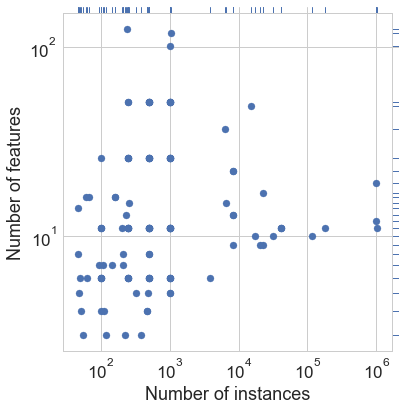

In [6]:
#plot of dataset properties
import matplotlib.pyplot as plt

df_data=pd.read_csv('Regression_datasets_pmlb.tsv', sep='\t')
print(df_data.columns)
cool_ids = [d.split('_')[0] for d in df_reg.dataset]
cool_ids = [d.split('_')[0] for d in cool_ds]

# df_data = df_data[df_data.did.isin(cool_ids)]
plt.figure()
sns.set(font_scale=1.7)
sns.set_style("whitegrid")
g=sns.JointGrid(x='NumberOfInstances',y='NumberOfFeatures', data=df_data,
               space=0,ratio=50)  
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height=1)
ax = g.ax_joint
ax.set_xlabel('Number of instances',size=18)
ax.set_ylabel('Number of features',size=18)
ax.set_xscale('log')
ax.set_yscale('log')
  
# ax.set_xticklabels([0,5000,10000,15000,20000,25000,30000],fontsize=14)
# ax.set_yticks(np.logspace(0,3,4))

# plt.yticks(size=20)
plt.savefig('../paper/figs/appendix/pmlb.pdf')
sns.set(font_scale=1)


method median mean std
Lex 0.817260293401096 -inf nan
LexNSGA2 0.8354604417055222 0.7840988163481215 0.1628364771316767
NSGA2 0.7654679769614114 0.7374330577634683 0.15079213345163212
Random 0.2769890344629892 0.4252376626455769 0.29757783814708755
SimAnneal 0.6142702132561149 0.6021309670270257 0.44245572775374586


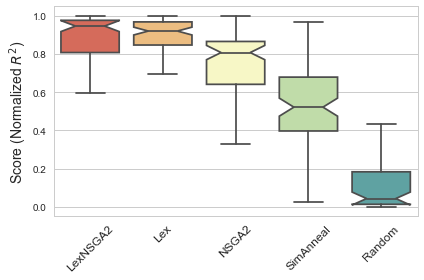

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(20,5))
df_reg['norm_score'] = df_reg.groupby('dataset')['score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df_sum=pd.DataFrame()#columns=['dataset','method','med_score'])
df_sum['med_score'] = df_reg.groupby(['dataset','method'])['score'].median().drop_duplicates()
df_sum['norm_score'] = df_reg.groupby(['dataset','method'])['norm_score'].median().drop_duplicates()

df_sum['count'] = df_reg.groupby(['dataset','method'])['score'].count()
# print(df_sum[:10])
df_sum=df_sum.reset_index(level=['dataset', 'method'])
# df_sum=df_sum.unstack(level=-1)
# print(df_sum)
# plt.figure()
# sns.barplot(data=df_sum,y='count',x='dataset',hue='method')
# plt.show()
# sns.boxplot(data=df_sum,x='method')
# sns.boxplot(data=df_sum,y='med_score',x='method',notch=True,showfliers=False, 
#             order=['LexNSGA2','MLP','Lex','NSGA2','SimAnneal','ElasticNet',  'Random'],palette='Spectral')
# for d,df_g in df_reg.groupby('dataset'):
#     h = plt.figure()
sns.set_style('whitegrid')
sns.boxplot(data=df_sum,y='norm_score',x='method',notch=True,showfliers=False, 
             palette='Spectral',
            order=Order)
#             order=['RF','KernelRidge','','CN','Corr','SXO','CNSXO','CorrSXO'])
#             order=['RF','KernelRidge','MLP'])

# plt.title(d)
# plt.ylim([-1,1])
plt.xticks(rotation=45,size=12)
plt.ylabel('Score (Normalized $R^2$)',size=14)
plt.xlabel('')
# plt.xlabel('Algorithm',size=14)
plt.tight_layout()
plt.savefig('../paper/figs/appendix/boxplot_score.pdf')

print('method','median','mean','std')
for m,df in df_reg.groupby('method'):
    print(m,df['score'].median(),df['score'].mean(),df['score'].std())

23 x 4


No handles with labels found to put in legend.


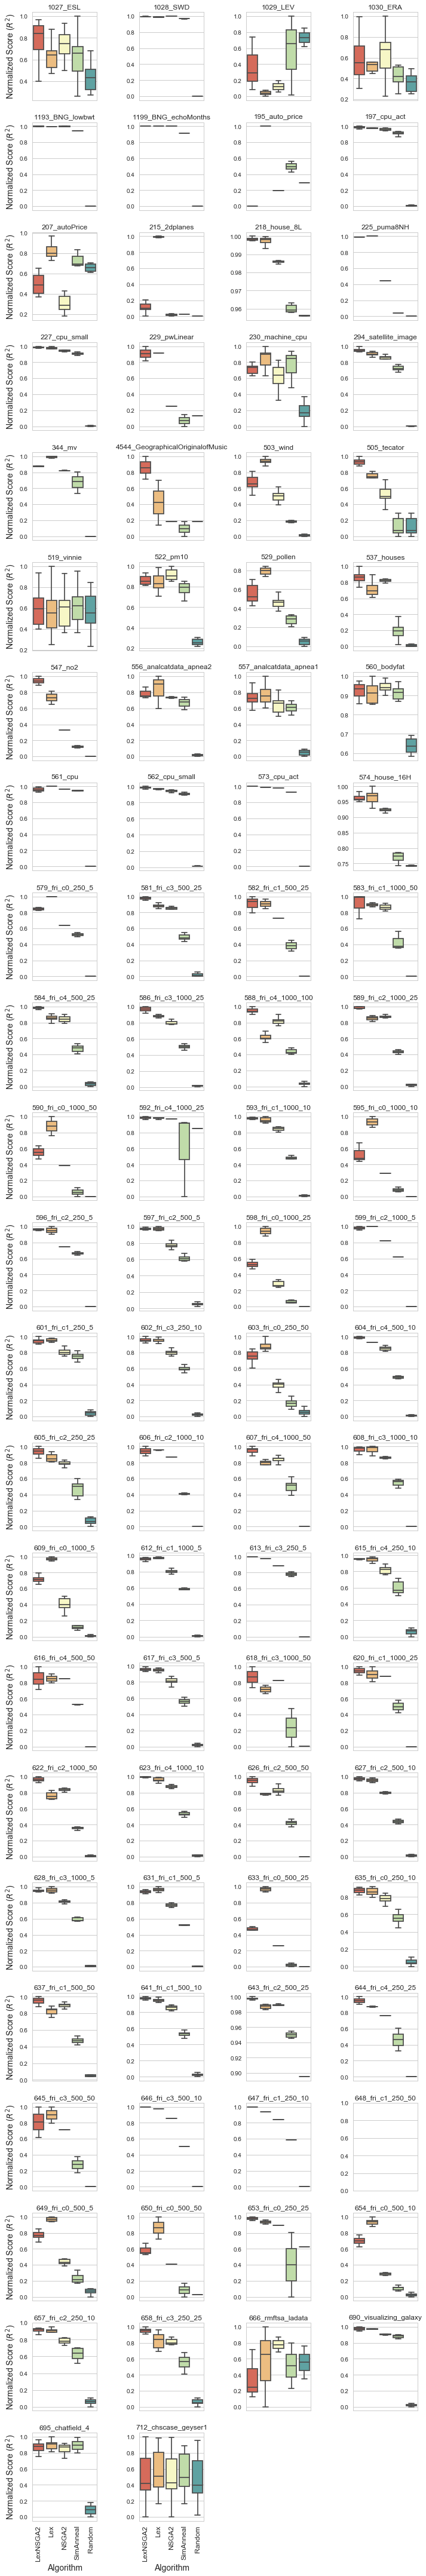

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(20,5))
df_reg['norm_score'] = df_reg.groupby('dataset')['score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df_sum=pd.DataFrame()#columns=['dataset','method','med_score'])
df_sum['med_score'] = df_reg.groupby(['dataset','method'])['score'].median().drop_duplicates()
df_sum['norm_score'] = df_reg.groupby(['dataset','method'])['norm_score'].median().drop_duplicates()

df_sum['count'] = df_reg.groupby(['dataset','method'])['score'].count()
# print(df_sum[:10])
df_sum=df_sum.reset_index(level=['dataset', 'method'])

nc = 4
nr = int(len(df_reg.dataset.unique())/4)+1
print(nr,'x',nc)
h = plt.figure(figsize=(10,60))
for i,(d,df_g) in enumerate(df_reg.groupby('dataset')):
    h.add_subplot(nr,nc,i+1)
    sns.boxplot(data=df_g,y='norm_score',x='method',notch=False,showfliers=False, 
        order=Order,palette='Spectral')
    plt.title(d)
# plt.ylim([-1,1])
    if (i+1)/nc>nr-1:
        plt.xticks(rotation=90,size=12)
        plt.xlabel('Algorithm',size=14)
    else:
        plt.gca().set_xticks([])
        plt.xlabel('')
    if np.mod(i,nc)==0:
        plt.ylabel('Normalized Score ($R^2$)',size=14)
    else:
        plt.ylabel('')
    if i == len(df_reg.groupby('dataset'))-1:
        plt.legend(loc=(0.8,0.1))
plt.tight_layout()
plt.savefig('../paper/figs/appendix/boxplot_score_by_dataset.pdf')


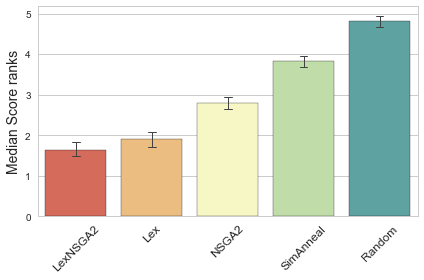

In [9]:
# ranks
import matplotlib.pyplot as plt
%matplotlib inline
df_ranks = pd.DataFrame(dtype=float)
# tmp = df_reg.groupby(['dataset','method'])['score']
df_ranks['median_scores'] = df_reg.groupby(['dataset','method'])['score'].median().drop_duplicates()
df_ranks['median_sizes'] = df_reg.groupby(['dataset','method'])['size'].median().drop_duplicates()

df_ranks= pd.DataFrame({"rank_r2": df_ranks.groupby('dataset')['median_scores'].rank(ascending=False),
                        "rank_size": df_ranks.groupby('dataset')['median_sizes'].rank(ascending=True)}).reset_index()

# # plt.figure(figsize=(20,5))
# df_ranks.to_csv('ranks.csv',index=False)
sns.barplot(data=df_ranks,y='rank_r2',x='method',edgecolor=(0,0,0),capsize=0.1,errwidth=1,
            fill=True,palette='Spectral',
            order=Order)
#             order=['RF','KernelRidge','','CN','Corr','SXO','CNSXO','CorrSXO'])
# # plt.ylim([-1,1])
plt.xticks(rotation=45,size=12)
plt.ylabel('Median Score ranks',size=14)
plt.xlabel('')
plt.tight_layout()
plt.savefig('../paper/figs/appendix/barplot_ranks.pdf')

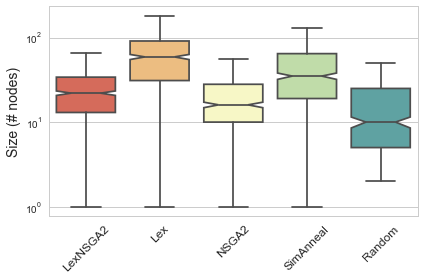

In [13]:
# import matplotlib.pyplot as plt
%matplotlib inline

df_reg['size'] = df_reg['size'].apply(pd.to_numeric)

sns.boxplot(data=df_reg,y='size',x='method',notch=True,showfliers=False,palette='Spectral',
            order=[o for o in Order if o != 'KernelRidge'])
# plt.ylim([-1,1])
plt.xticks(rotation=45,size=12)
plt.ylabel('Size (# nodes)',size=14)
plt.xlabel('')
plt.gca().set_yscale('log')

plt.tight_layout()
plt.savefig('../paper/figs/appendix/boxplot_size.pdf')

['axes.grid', 'axes.grid.axis', 'axes.grid.which', 'axes3d.grid', 'grid.alpha', 'grid.color', 'grid.linestyle', 'grid.linewidth', 'keymap.grid', 'keymap.grid_minor', 'polaraxes.grid']


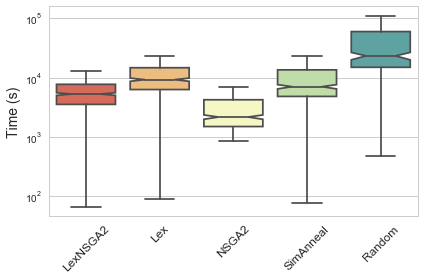

In [14]:
print([g for g in plt.rcParams.keys() if 'grid' in g])
sns.boxplot(data=df_reg,y='time',x='method',notch=True,showfliers=False, palette='Spectral',
            order=Order)
#             order=['','CN','Corr','SXO','CNSXO','CorrSXO'])
plt.ylabel('Time (s)',size=14)
plt.xticks(rotation=45,size=12)
plt.xlabel('')
plt.gca().set_yscale('log')

plt.tight_layout()
plt.savefig('../paper/figs/appendix/boxplot_time.pdf')

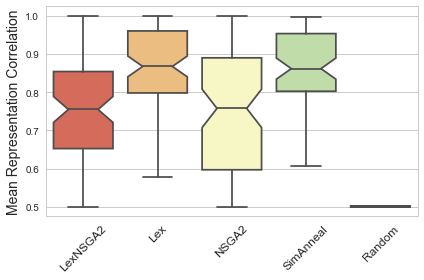

In [19]:
pal = sns.color_palette('Spectral',n_colors=len(Order))
# print(len(pal))

# for i,o in reversed(list(enumerate(Order))):
#     if o not in ['Feat','FeatCorr','FeatCN','MLP','ElasticNet']:
#         print(i)
#         del pal[i]
        
df_reg['norm_corr'] = df_reg.groupby('dataset')['corr'].transform(lambda x: (x - x.min()) / (x.max() - x.min())).apply(lambda x: x if not np.isnan(x) else 1.0)
df_sum=pd.DataFrame()#columns=['dataset','method','med_score'])
df_sum['med_corr'] = df_reg.groupby(['dataset','method'])['corr'].median().drop_duplicates()
df_sum['norm_corr'] = df_reg.groupby(['dataset','method'])['norm_corr'].median().drop_duplicates()
df_sum=df_sum.reset_index(level=['dataset', 'method'])
# sns.set_palette(pal)
h = plt.figure()
df_sum.loc[df_sum.method=='ElasticNet','method'] = 'Baseline'
sns.boxplot(data=df_sum,y='med_corr',x='method',notch=True,showfliers=False,
        palette=sns.color_palette(pal), order=Order)
#             ,order=[o for o in Order if o not in ['RF']])
#         order=['','SXO','CN','Corr','CNSXO','CorrSXO'])
# plt.title(d)
plt.ylabel('Mean Representation Correlation',size=14)
plt.xlabel('')
plt.xticks(rotation=45,size=12)
plt.tight_layout()
plt.savefig('../paper/figs/appendix/boxplot_corr.pdf')

In [ ]:
pal = sns.color_palette('Spectral',n_colors=7)
del pal[2]
print(pal)
# sns.set_palette(pal)
for d,df_g in df_reg.groupby('dataset'):
    h = plt.figure()
    sns.boxplot(data=df_g,y='corr',x='method',notch=False,showfliers=False,
            palette=sns.color_palette(pal),
                order=Order)
#             order=['','SXO','CN','Corr','CNSXO','CorrSXO'])
    plt.title(d)
    plt.ylabel('Mean Feature Correlation',size=14)
    plt.xlabel('')
    plt.xticks(rotation=45,size=12)
    plt.tight_layout()
# plt.savefig('../paper/figs/boxplot_corr.pdf')